<a id='head_selection_2'></a>
# 2015 USA Flight Data Visualzation
This notebook contains feature engeenering and data analyst of 2015 Flight Data from US Department of Transportation

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import  metrics
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
import flight_data_transformation as fdf

C:\Users\damix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## Flight Data loading

In [3]:
data = pd.read_csv('DATA/flights.csv')

C:\Users\damix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Feature engineering

Whole process of data transformation has been implemented in Flights_data_transformation notebook and implemented in flight_data_transformer function in flight_data_transformation.py file.


In [4]:
Flights_Delays_to_plot = fdf.flight_data_transformer(data)

In [5]:
Flights_Delays_to_plot

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,WHEELS_ON,TAXI_IN,ARRIVAL_DELAY,DEP_TIME,SCH_ARR_TIME,SCH_DEP_TIME,ARR_TIME,DATE,DayOfWeek,Holidays
0,AS,98,N407AS,ANC,SEA,-11.0,21.0,00:15:00,205.0,194.0,...,04:04:00,4.0,-22.0,23:54:00,04:30:00,00:05:00,04:08:00,2015-01-01,3,0
1,AA,2336,N3KUAA,LAX,PBI,-8.0,12.0,00:14:00,280.0,279.0,...,07:37:00,4.0,-9.0,00:02:00,07:50:00,00:10:00,07:41:00,2015-01-01,3,0
2,US,840,N171US,SFO,CLT,-2.0,16.0,00:34:00,286.0,293.0,...,08:00:00,11.0,5.0,00:18:00,08:06:00,00:20:00,08:11:00,2015-01-01,3,0
3,AA,258,N3HYAA,LAX,MIA,-5.0,15.0,00:30:00,285.0,281.0,...,07:48:00,8.0,-9.0,00:15:00,08:05:00,00:20:00,07:56:00,2015-01-01,3,0
4,AS,135,N527AS,SEA,ANC,-1.0,11.0,00:35:00,235.0,215.0,...,02:54:00,5.0,-21.0,00:24:00,03:20:00,00:25:00,02:59:00,2015-01-01,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,B6,688,N657JB,LAX,BOS,-4.0,22.0,00:17:00,320.0,298.0,...,07:49:00,4.0,-26.0,23:55:00,08:19:00,23:59:00,07:53:00,2015-12-31,3,0
5819075,B6,745,N828JB,JFK,PSE,-4.0,17.0,00:12:00,227.0,215.0,...,04:27:00,3.0,-16.0,23:55:00,04:46:00,23:59:00,04:30:00,2015-12-31,3,0
5819076,B6,1503,N913JB,JFK,SJU,-9.0,17.0,00:07:00,221.0,222.0,...,04:24:00,8.0,-8.0,23:50:00,04:40:00,23:59:00,04:32:00,2015-12-31,3,0
5819077,B6,333,N527JB,MCO,SJU,-6.0,10.0,00:03:00,161.0,157.0,...,03:27:00,3.0,-10.0,23:53:00,03:40:00,23:59:00,03:30:00,2015-12-31,3,0


## Correlation between numeric variables

<AxesSubplot:>

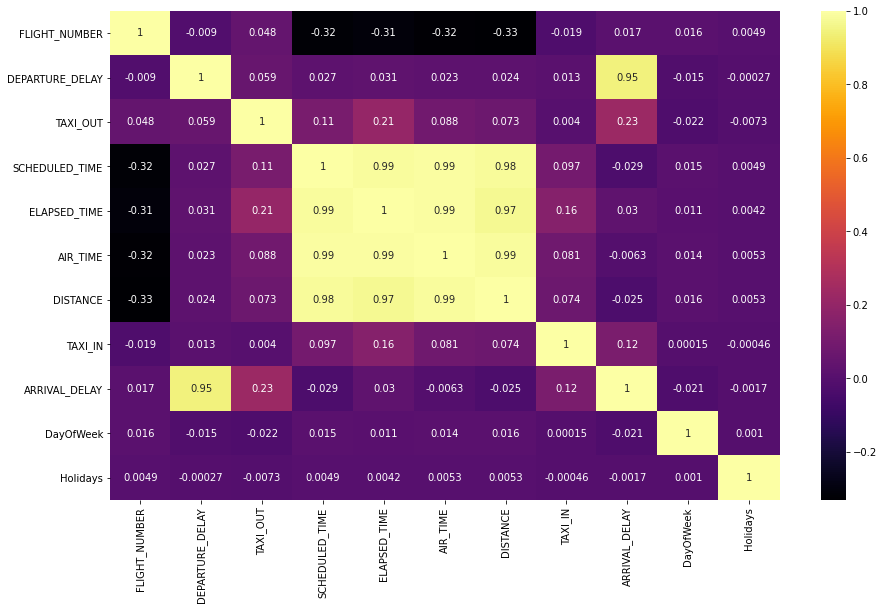

In [6]:
del_corr = Flights_Delays_to_plot.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(del_corr,annot=True,cmap='inferno')

In [7]:
airlines_names = pd.read_csv('DATA/airlines.csv')
airlines_names

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


For further use, I put the content of this this dataframe in a dictionary:

In [8]:
airlines_dict = airlines_names.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [9]:
#Flights_Delays_Combined['AIRLINE'] = Flights_Delays_Combined['AIRLINE'].map(airlines_dict)

In [10]:
airlines_dict

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

In [11]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:

global_stats = Flights_Delays_to_plot['ARRIVAL_DELAY'].groupby(Flights_Delays_to_plot['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats = global_stats.set_index(global_stats.index.map(airlines_dict))
global_stats

,min,max,count,mean
AIRLINE,,,,
Virgin America,-78.0,651.0,55813.0,4.979539
Hawaiian Airlines Inc.,-67.0,1467.0,69815.0,2.161856
Frontier Airlines Inc.,-73.0,1101.0,82005.0,13.729468
Spirit Air Lines,-60.0,833.0,105059.0,15.210786
Alaska Airlines Inc.,-82.0,950.0,157025.0,-0.791409
US Airways Inc.,-87.0,750.0,194223.0,3.706209
JetBlue Airways,-76.0,1002.0,240304.0,6.949339
American Eagle Airlines Inc.,-63.0,1272.0,257130.0,7.316540
United Air Lines Inc.,-81.0,1294.0,462086.0,6.211316


As you can see there are minus values of delay. It informs about plane arriving earlier. In further analysis **DELATION**/**DELAY** will be called only positive value of ARRIVAL_DELAY.

I'm going to specify 3 types of delays:
* if delay <= 15 min flight is *on time*
* if delay > 15 min and < 45 it's *small delay*
* if delay > 45 min it's *high delay*

In [12]:
delay_type = lambda x: 0 if x <= 15 else (2 if x>45 else (1))
Flights_Delays_to_plot['DELAY_LEVEL'] = Flights_Delays_to_plot['DEPARTURE_DELAY'].apply(delay_type)

In [13]:
delay_type(60)

2

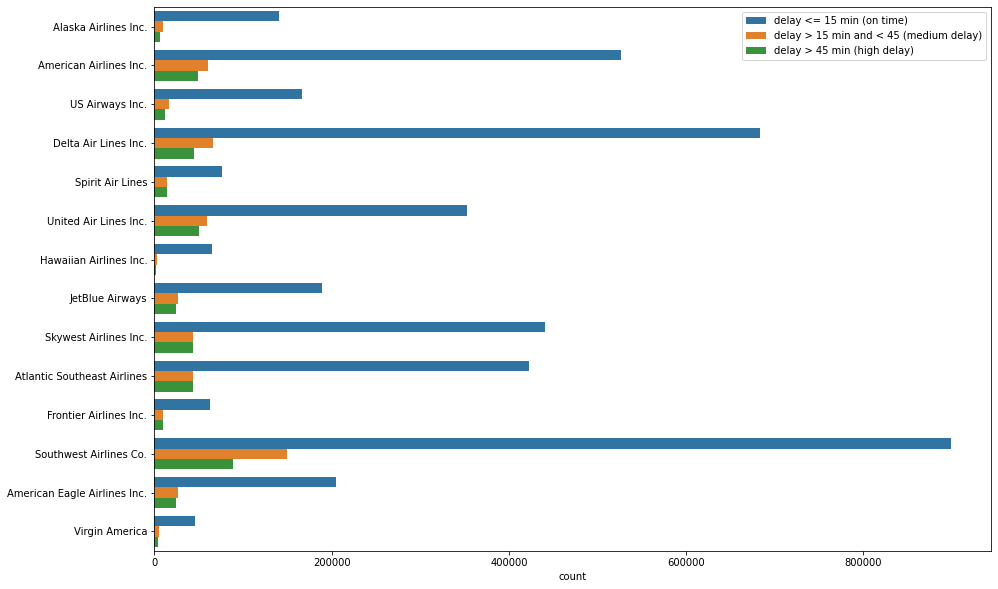

In [14]:
fig = plt.figure(1, figsize=(15,10))
Delay_Count_Plot_1 = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=Flights_Delays_to_plot)
labels = [airlines_dict[item.get_text()] for item in Delay_Count_Plot_1.get_yticklabels()]
Delay_Count_Plot_1.set_yticklabels(labels)
Delay_Count_Plot_1.yaxis.label.set_visible(False)
Legend_1 = plt.legend()
Legend_1.get_texts()[0].set_text('delay <= 15 min (on time)')
Legend_1.get_texts()[1].set_text('delay > 15 min and < 45 (medium delay)')
Legend_1.get_texts()[2].set_text('delay > 45 min (high delay)')
plt.show()

In [15]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#______________________________________________________________
Flights_Delays_to_plot['ARRIVAL_DELAY'].groupby(Flights_Delays_to_plot['AIRLINE']).apply(get_stats).unstack()

,min,max,count,mean
AIRLINE,,,,
AA,-87.0,1971.0,636554.0,3.935214
AS,-82.0,950.0,157025.0,-0.791409
B6,-76.0,1002.0,240304.0,6.949339
DL,-79.0,1274.0,794817.0,0.680265
EV,-64.0,1223.0,509621.0,6.964550
F9,-73.0,1101.0,82005.0,13.729468
HA,-67.0,1467.0,69815.0,2.161856
MQ,-63.0,1272.0,257130.0,7.316540
NK,-60.0,833.0,105059.0,15.210786


In [16]:
delation_type_count = Flights_Delays_to_plot['DELAY_LEVEL'].groupby(Flights_Delays_to_plot['AIRLINE'], as_index=True).value_counts().unstack()
delation_type_count

DELAY_LEVEL,0,1,2
AIRLINE,,,
AA,527029,60566,48959
AS,140446,10136,6443
B6,188660,27131,24513
DL,683473,66241,45103
EV,422134,43703,43784
F9,62990,9696,9319
HA,64952,3489,1374
MQ,205456,27220,24454
NK,76334,14373,14352


## Airline delay factor
Airline Delay Factor (ADF) is counted as count of delation type 1 and 2 (more than >15 of delay) divided by all flights by this career.

In [17]:
flights = (delation_type_count[0]+delation_type_count[1]+delation_type_count[2])

ADF = (delation_type_count[1]+delation_type_count[2])/flights
a = np.ascontiguousarray((ADF.index,ADF,flights)).T
ADF_table_1 = pd.DataFrame(a,columns=['AIRLINE','ADF','Flights'])
ADF_table_1 = ADF_table_1.sort_values('ADF')
ADF_table_1['AIRLINE'] = ADF_table_1['AIRLINE'].map(airlines_dict)
#ADF_table_1 = ADF_table_1.reset_index()
ADF_table_1

,AIRLINE,ADF,Flights
6,Hawaiian Airlines Inc.,0.0696555,69815
1,Alaska Airlines Inc.,0.105582,157025
3,Delta Air Lines Inc.,0.140088,794817
11,US Airways Inc.,0.143407,194223
9,Skywest Airlines Inc.,0.16556,528328
4,Atlantic Southeast Airlines,0.171671,509621
0,American Airlines Inc.,0.172059,636554
12,Virgin America,0.174923,55813
7,American Eagle Airlines Inc.,0.200964,257130
13,Southwest Airlines Co.,0.209993,1138350


[]

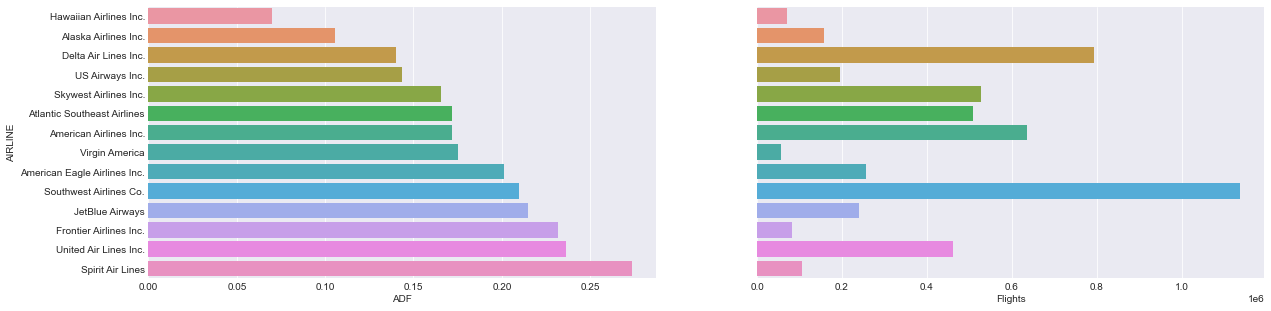

In [18]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

fig, ax = plt.subplots(1,2,figsize=(20,5))
a1 = sns.barplot(x='ADF',y='AIRLINE',data=ADF_table_1, ax=ax[0])
a2 = sns.barplot(x='Flights',y='AIRLINE',data=ADF_table_1, ax=ax[1])
a2.set_ylabel('')   
a2.set_yticks([])

### Conclusions
* Sprint Air Lines has the highest delay to operations in total factor. More than 25% of flights by Sprint Air are delayed, but as it can be seen on right chart they have one of the lowest number of flights per year.
* Delta Air Lines has one of the lowest ADF with one of the highest number of flights. That means that they have the best delay factor in compartment of the biggest airlines.
* Southwest Airlines Co. has the largest amount of flight, but also with very high ADF. More than every fifth Southwest flight is delayed.

## Holiday ~ Delays correlation
Belows charts represent flight delays in time. Vertical lines represents Official Holidays in USA.

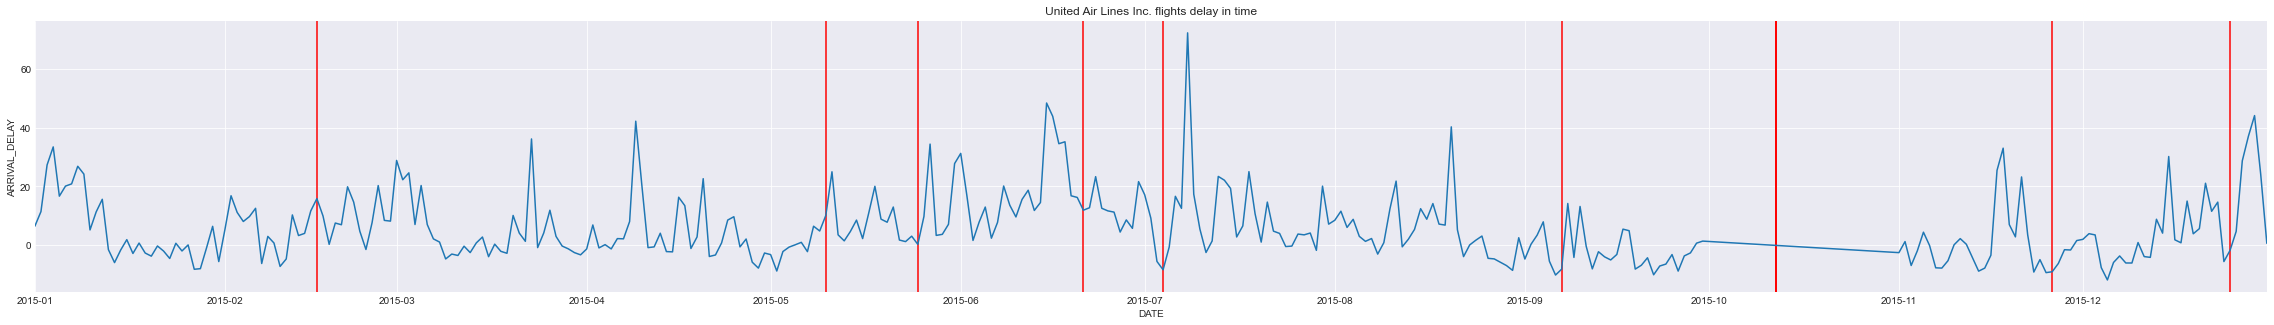

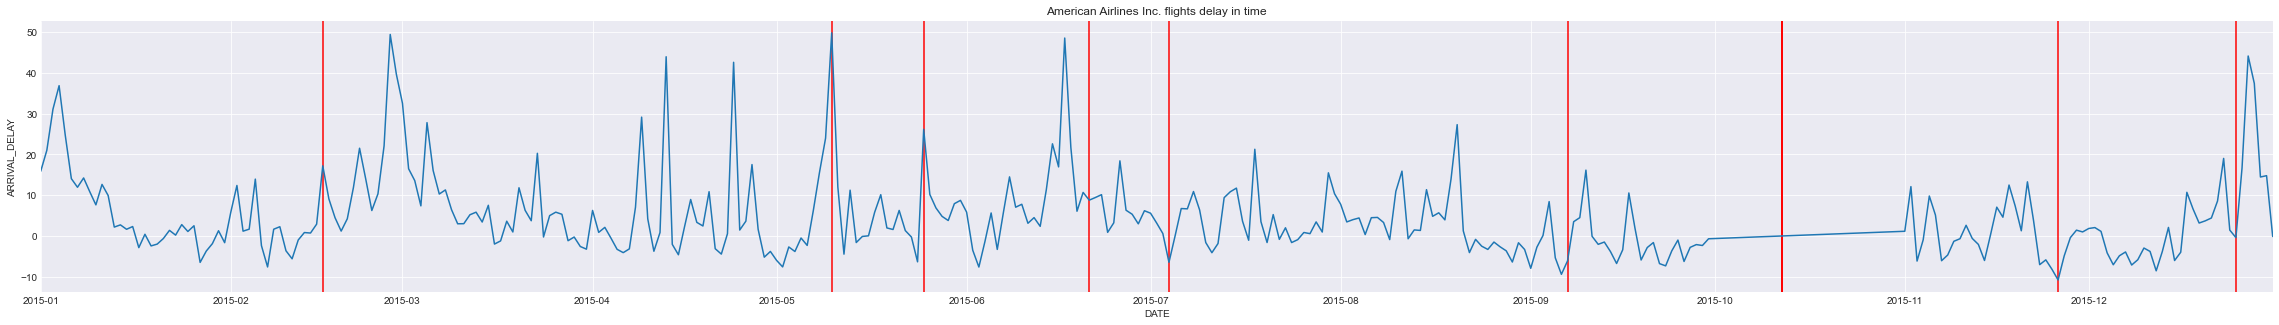

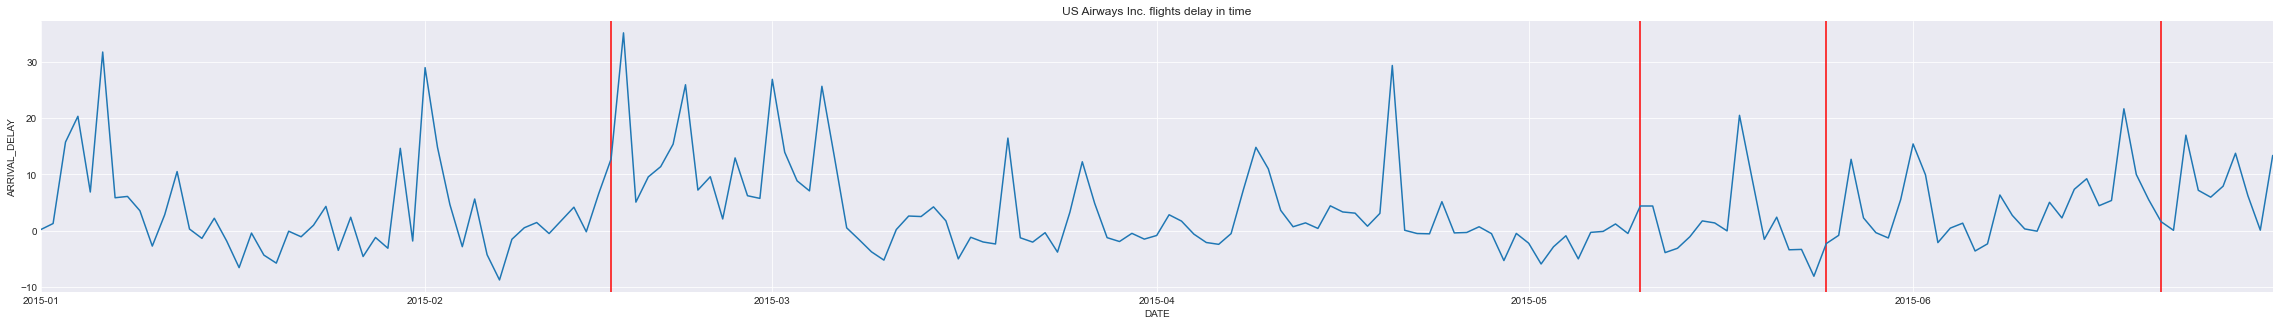

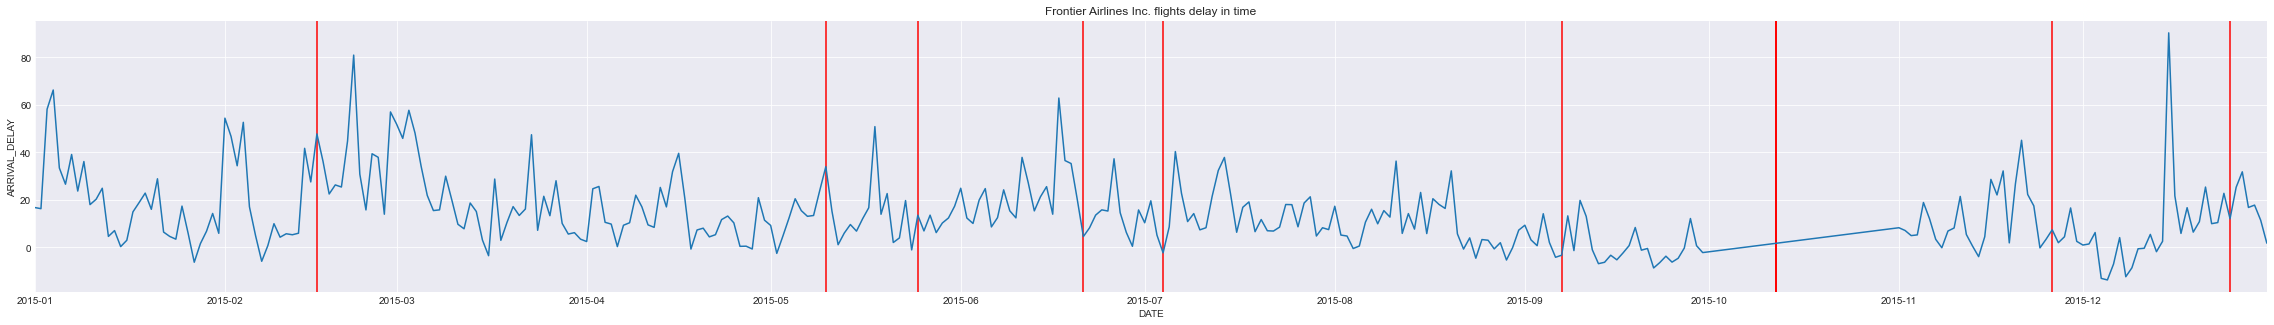

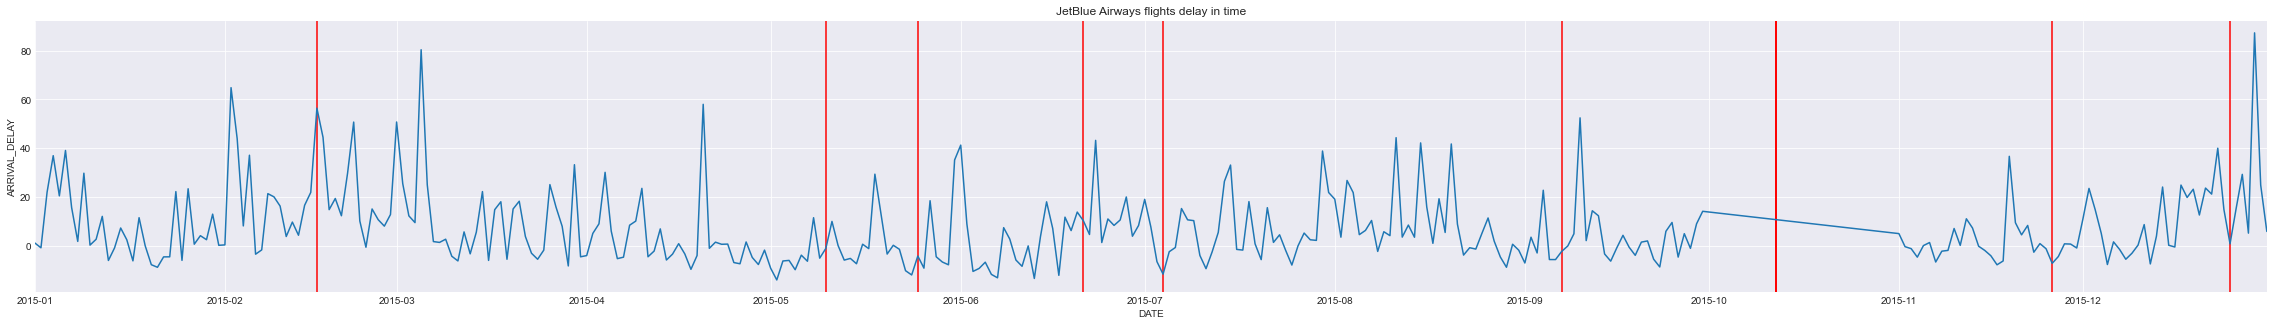

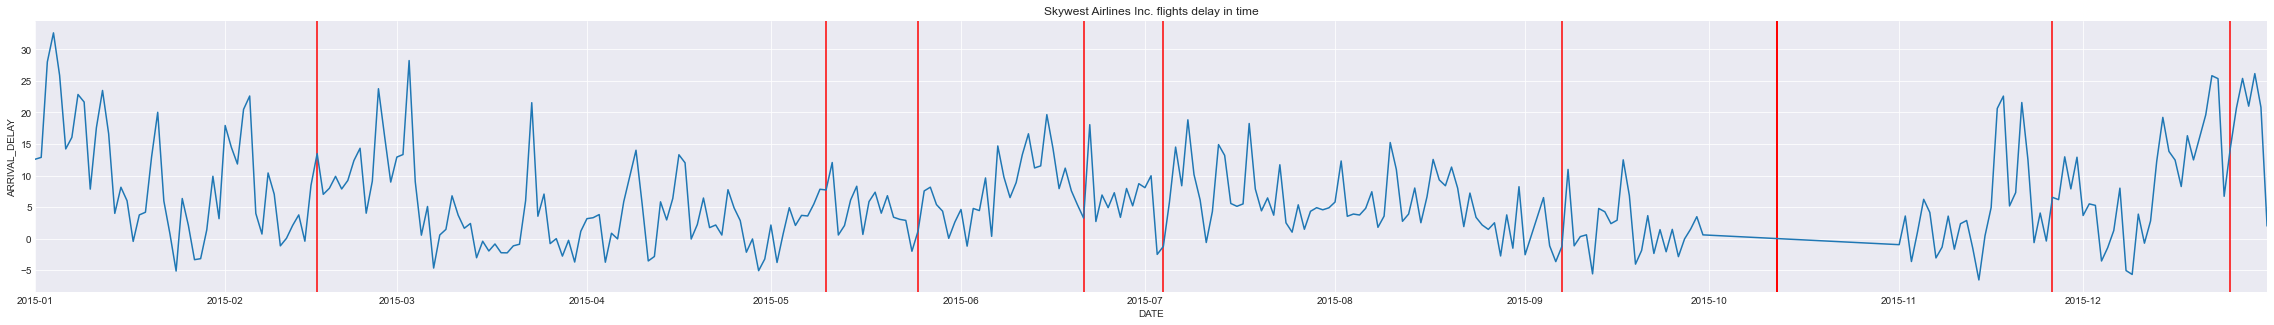

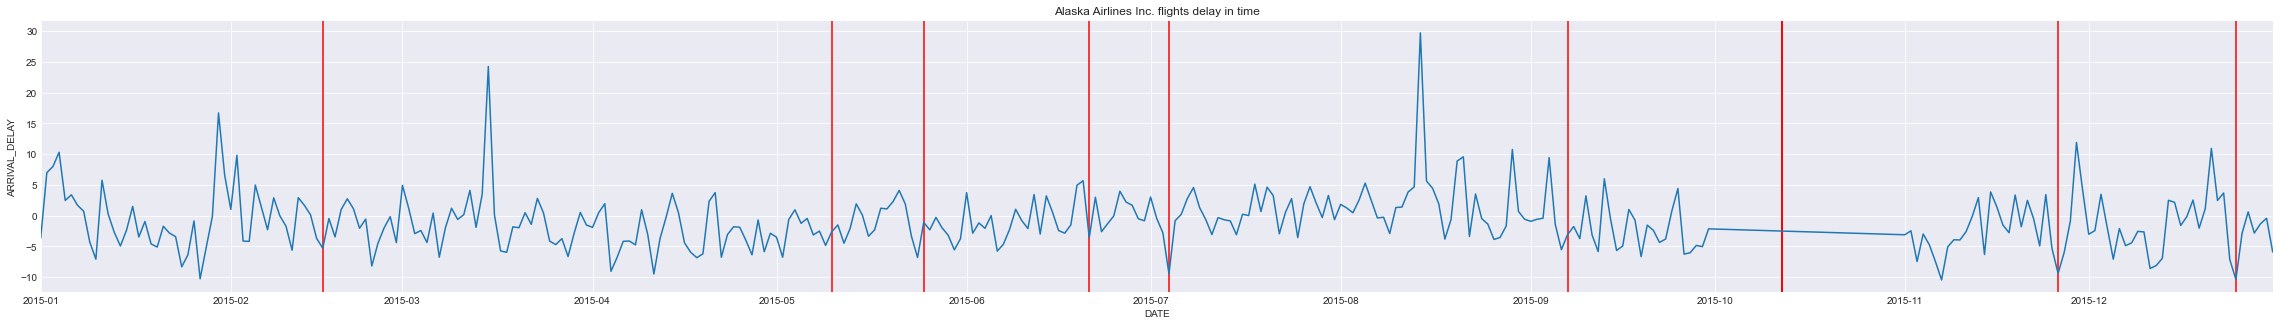

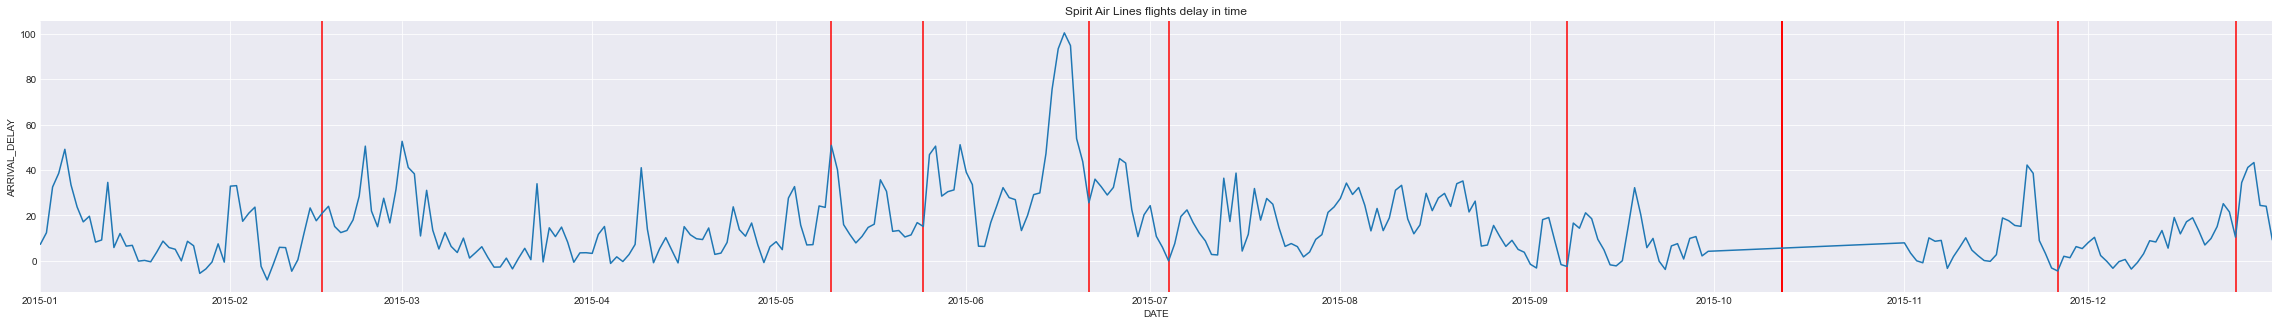

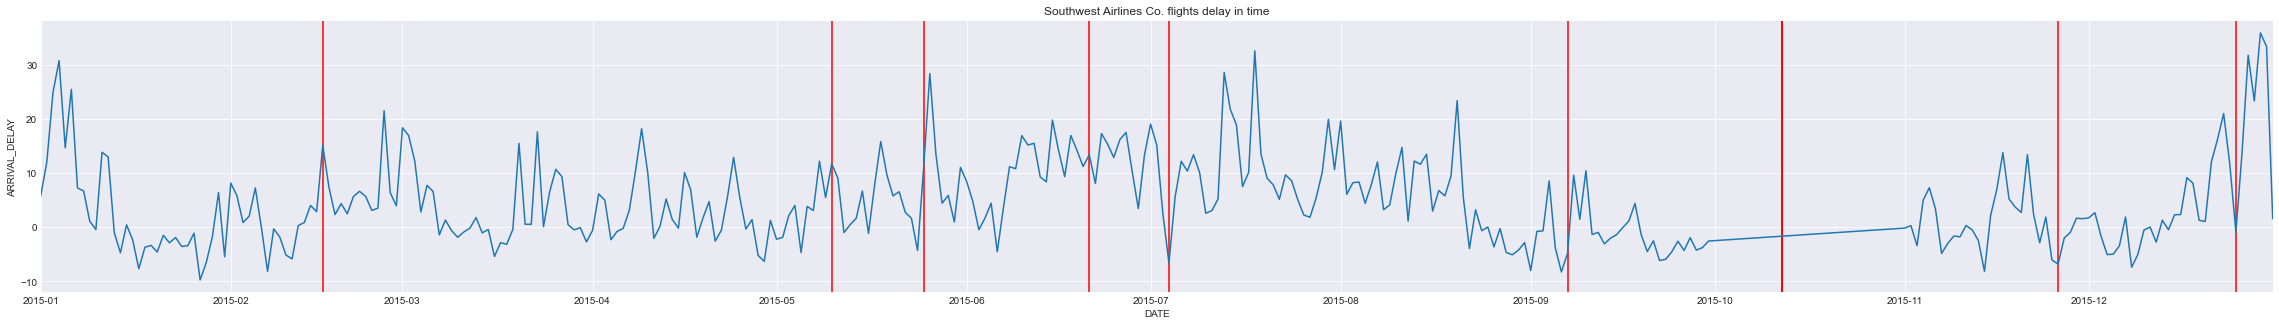

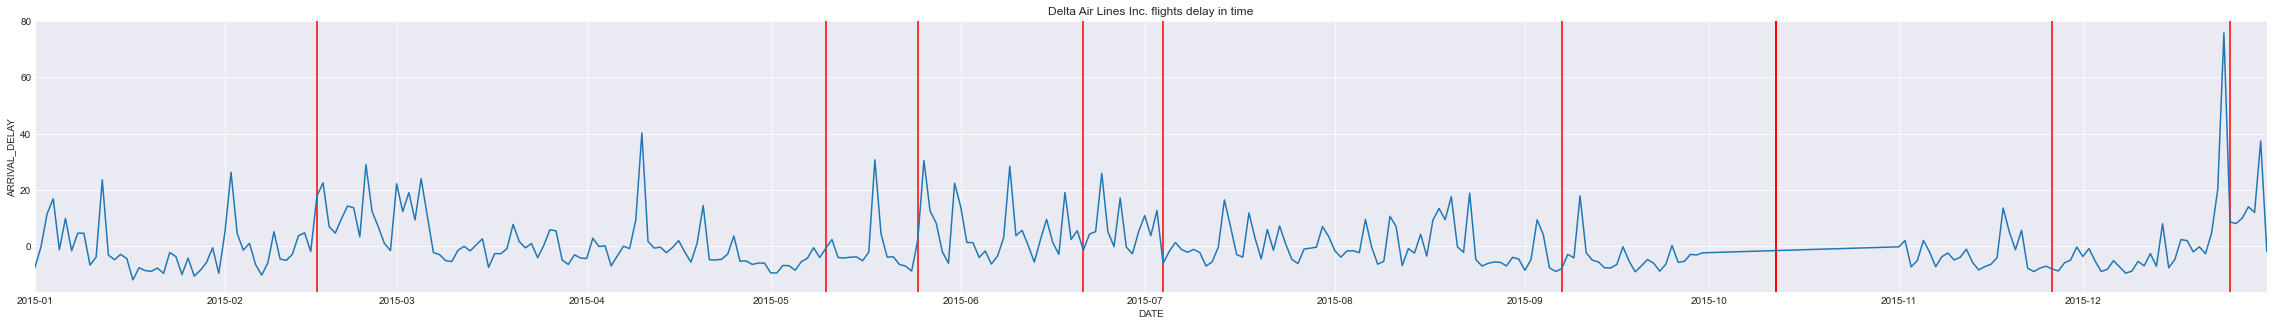

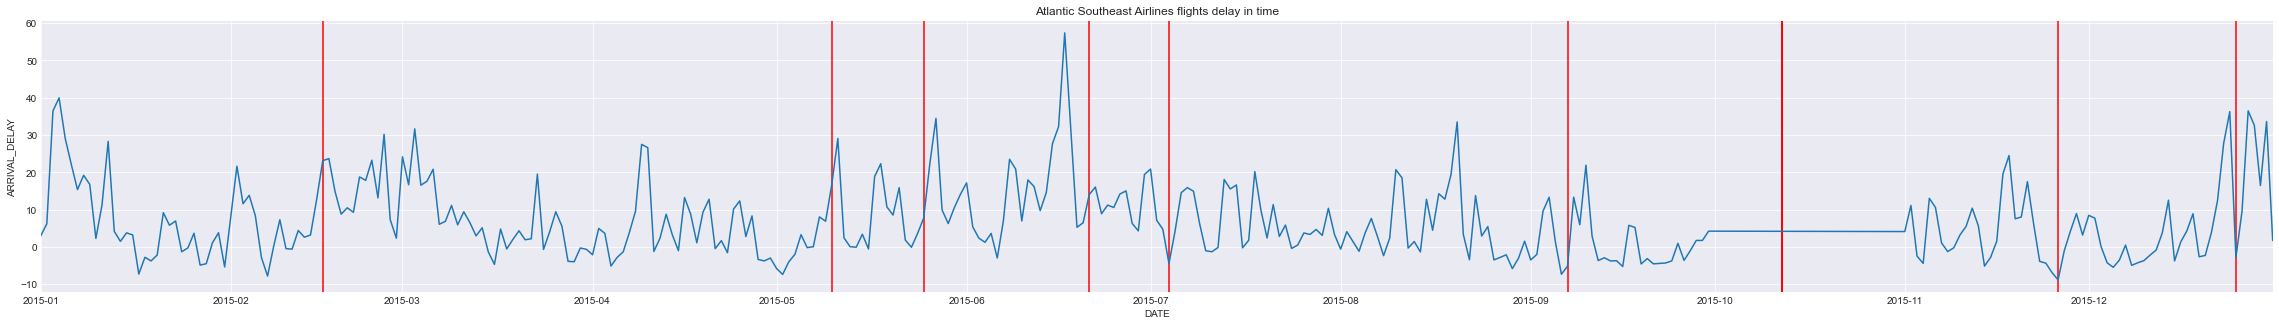

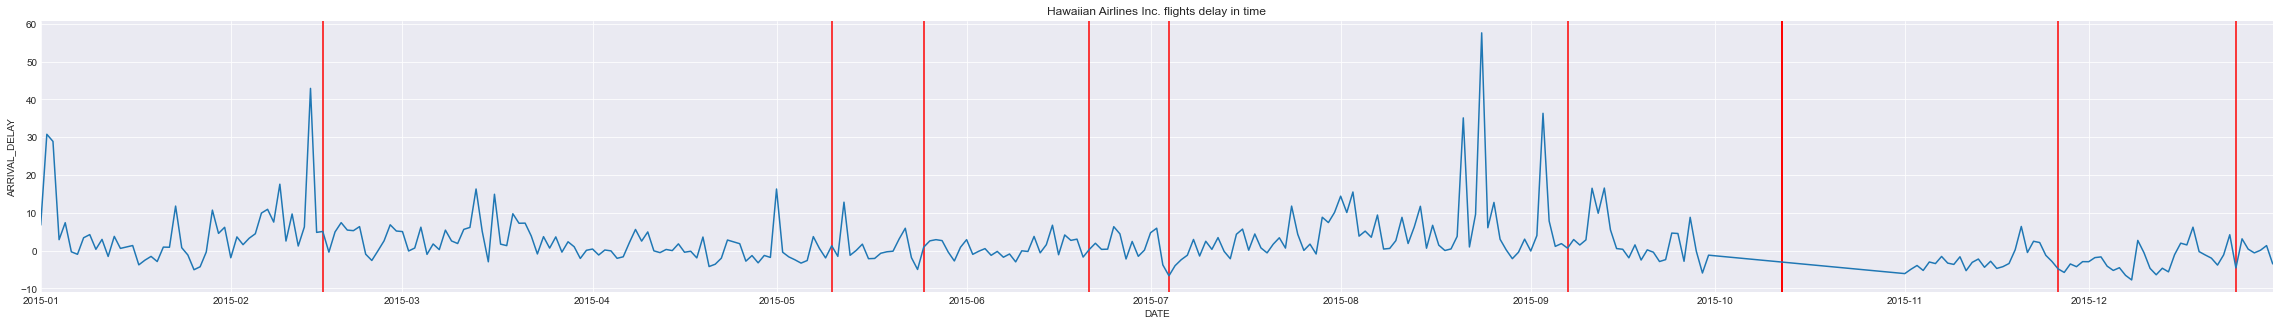

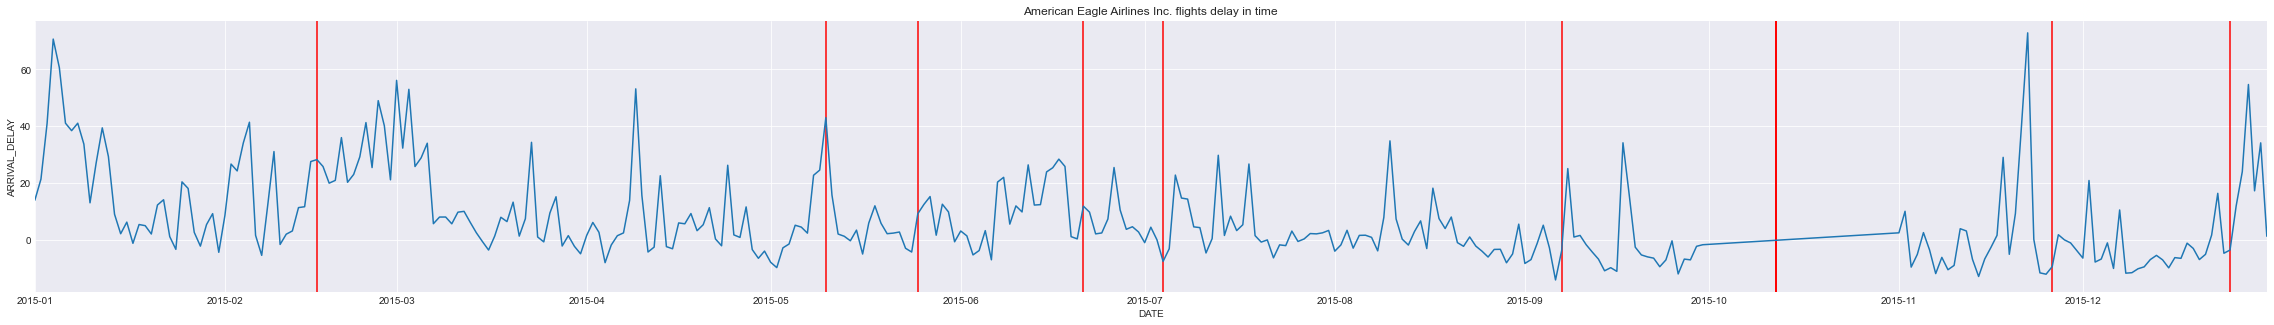

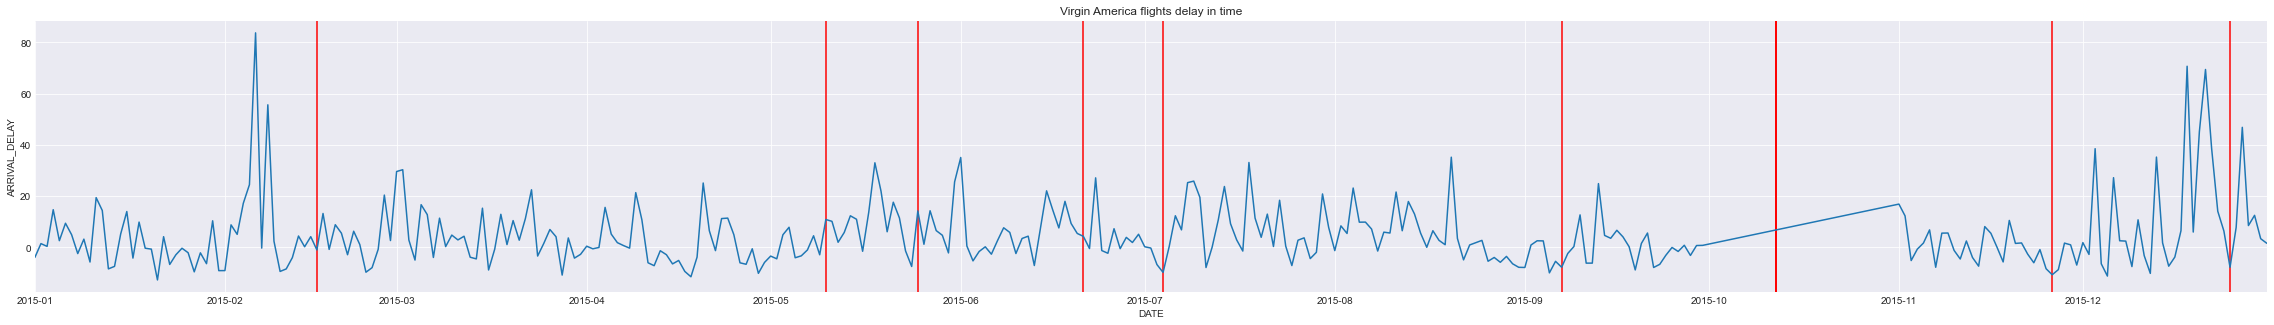

In [19]:
holidays_dates = fdf.get_holidays()
for idx, car in enumerate(airlines_dict.keys()):
    fig = plt.figure(idx, figsize=(40,5))
    carrier = Flights_Delays_to_plot[Flights_Delays_to_plot['AIRLINE'] == car]
    carrier = carrier['ARRIVAL_DELAY'].groupby(carrier['DATE']).apply(np.mean)
    carrier = carrier.reset_index()
    for holiday_date in holidays_dates:
        plt.axvline(holiday_date, color='red')

    carrir_delay_plot = sns.lineplot(carrier['DATE'], carrier['ARRIVAL_DELAY'])
    carrir_delay_plot.set_xlim(carrier['DATE'].min(), carrier['DATE'].max())
    carrir_delay_plot.set_title(str(airlines_dict[car])+' flights delay in time')
    plt.show()

### Conclusions
* All above charts shows significat flight delay decrese in 04.07.2015, which was Independence Day. This could be correlated with less passenger traffic.
* Strong correlation between holidays and flight delays can be seen before and after 25 December. It's correlated with higher passenger traffic.

# Airports

## Loading airport data

In [20]:
airport_data = pd.read_csv('DATA/airports.csv')

In [21]:
airport_data.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [22]:
airport_dict = airport_data.set_index('IATA_CODE')['AIRPORT'].to_dict()

## Top 15 airports from Flight table

In [23]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

airport_stats = Flights_Delays_to_plot['ARRIVAL_DELAY'].groupby(Flights_Delays_to_plot['DESTINATION_AIRPORT']).agg(['count'])
airport_stats['name'] = (airport_stats.index.map(airport_dict))
airport_stats = airport_stats.sort_values('count',ascending=False)
airport_stats_dict = airport_stats['count'].to_dict()
airport_data['Count'] = (airport_data['IATA_CODE'].map(airport_stats_dict))
airport_data_top15 = airport_data.sort_values('Count',ascending=False).head(15)
airport_data_top15

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Count
20,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,343076
228,ORD,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446,275864
86,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720,231764
85,DEN,Denver International Airport,Denver,CO,USA,39.85841,-104.66700,193033
176,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,192136
278,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,145409
239,PHX,Phoenix Sky Harbor International Airport,Phoenix,AZ,USA,33.43417,-112.00806,145378
151,IAH,George Bush Intercontinental Airport,Houston,TX,USA,29.98047,-95.33972,143587
174,LAS,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233,132124
216,MSP,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692,111146


Above result shows TOP 15 arrival destination in 2015. First place is hold by Atlanta Hartsfield-Jackson Atlanta International Airport. 

## Plotting top 15 airports

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


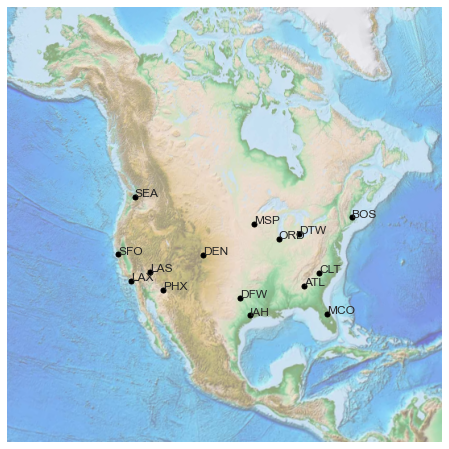

In [24]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting


for row in airport_data_top15.iterrows():
    x, y= m(row[1]['LONGITUDE'], row[1]['LATITUDE'])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, row[1]['IATA_CODE'], fontsize=12);

On above chart there are plotted 15 airports with highest amount of flights in 2015.

## Connections with highest delays

### Generating list of TOP 15 connections

In [25]:
Flights_Delays_to_plot['Connection']=(Flights_Delays_to_plot['ORIGIN_AIRPORT'])+'-'+(Flights_Delays_to_plot['DESTINATION_AIRPORT'])
top_15_connections_delays = Flights_Delays_to_plot['DELAY_LEVEL'].groupby(Flights_Delays_to_plot['Connection'], as_index=True).value_counts().unstack()
top_15_connections_delays['Sum of delay'] = top_15_connections_delays[1] + top_15_connections_delays[2]
top_15_connections_delays['Total # of flights'] = top_15_connections_delays[0] +top_15_connections_delays[1] + top_15_connections_delays[2]
top_15_connections_delays = top_15_connections_delays.sort_values('Sum of delay',ascending=False).head(15)
top_15_connections_delays

DELAY_LEVEL,0,1,2,Sum of delay,Total # of flights
Connection,,,,,
LAX-SFO,9878.0,1691.0,1540.0,3231.0,13109.0
SFO-LAX,10393.0,1569.0,1438.0,3007.0,13400.0
ORD-LGA,6759.0,1160.0,1182.0,2342.0,9101.0
ORD-SFO,5076.0,1201.0,996.0,2197.0,7273.0
LAX-JFK,9678.0,1240.0,933.0,2173.0,11851.0
ORD-LAX,5732.0,1155.0,939.0,2094.0,7826.0
LAS-LAX,7583.0,1227.0,841.0,2068.0,9651.0
LAX-LAS,7456.0,1228.0,838.0,2066.0,9522.0
LAS-SFO,5775.0,1016.0,1021.0,2037.0,7812.0


### Plot of TOP 15 delayed connections and Chart of total number of that flights

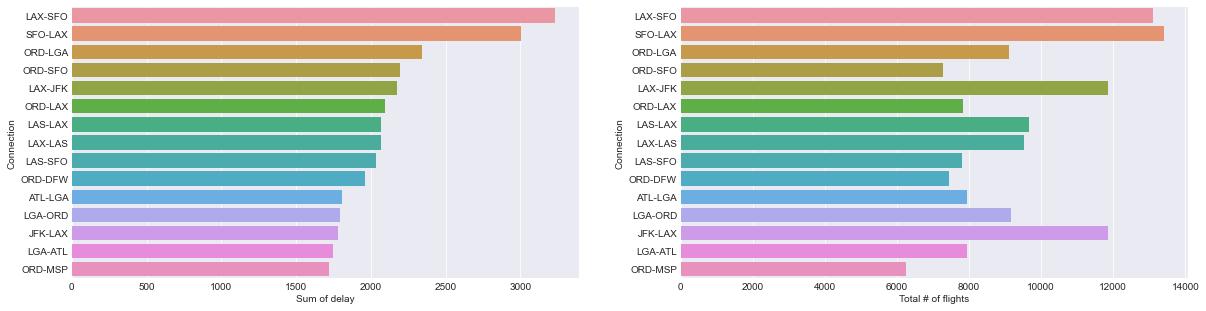

In [26]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
a4 = sns.barplot(y='Connection',x='Sum of delay',data=top_15_connections_delays.reset_index(), ax=ax[0])
a5 = sns.barplot(y='Connection',x='Total # of flights',data=top_15_connections_delays.reset_index(), ax=ax[1])
plt.show()

In [27]:
top_15_connections_delays.head(10)

DELAY_LEVEL,0,1,2,Sum of delay,Total # of flights
Connection,,,,,
LAX-SFO,9878.0,1691.0,1540.0,3231.0,13109.0
SFO-LAX,10393.0,1569.0,1438.0,3007.0,13400.0
ORD-LGA,6759.0,1160.0,1182.0,2342.0,9101.0
ORD-SFO,5076.0,1201.0,996.0,2197.0,7273.0
LAX-JFK,9678.0,1240.0,933.0,2173.0,11851.0
ORD-LAX,5732.0,1155.0,939.0,2094.0,7826.0
LAS-LAX,7583.0,1227.0,841.0,2068.0,9651.0
LAX-LAS,7456.0,1228.0,838.0,2066.0,9522.0
LAS-SFO,5775.0,1016.0,1021.0,2037.0,7812.0


For plotting reasons I'm deleting returning flights.
I delete flight only one flight duplicate by generating list "reversed_delay_list" of flights with flipped connections. If the flight is in "reversed_delay_list" then script delete it and it's flipped version from the list and flight connection list.

In [28]:
# Only one way connections to plot - removing duplicates

NUM_OF_CONNECTIONS = 6
df = top_15_connections_delays.head(NUM_OF_CONNECTIONS)
connections_without_duplicates = pd.DataFrame(df.index.tolist())
reversed_delay_list = ['-'.join(row.split('-')[::-1]) for row in df.index.tolist()]
for i,row in connections_without_duplicates.reset_index().drop('index',axis=1).iterrows():
    if (row[0] in (reversed_delay_list)):
        reversed_row = ('-'.join(row[0].split('-')[::-1]))
        connections_without_duplicates.drop(i,axis=0,inplace=True)
        reversed_delay_list.remove(row[0])
        reversed_delay_list.remove(reversed_row)
connections_without_duplicates = connections_without_duplicates.reset_index().drop('index',axis=1)
connections_delays = pd.DataFrame([row.split('-') for row in connections_without_duplicates[0].tolist()],columns=['FROM','TO']).merge(airport_data, left_on='FROM', right_on='IATA_CODE').merge(airport_data, left_on='TO', right_on='IATA_CODE',suffixes=('_FROM', '_TO'))
connections_without_duplicates

,0
0,SFO-LAX
1,ORD-LGA
2,ORD-SFO
3,LAX-JFK
4,ORD-LAX


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


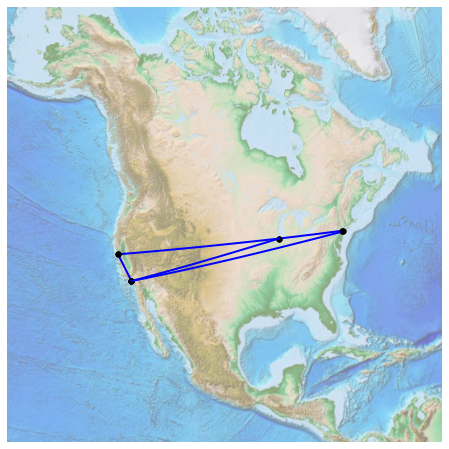

In [29]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting


for row in connections_delays.iterrows():
    x, y= m(row[1]['LONGITUDE_FROM'], row[1]['LATITUDE_FROM'])
    plt.plot(x, y, 'ok', markersize=5)
    #plt.text(x, y, row[1]['IATA_CODE_FROM'], fontsize=12);
    m.drawgreatcircle(row[1]['LONGITUDE_FROM'],row[1]['LATITUDE_FROM'],row[1]['LONGITUDE_TO'],row[1]['LATITUDE_TO'],linewidth=2,color='b')
    x, y= m(row[1]['LONGITUDE_TO'], row[1]['LATITUDE_TO'])
    plt.plot(x, y, 'ok', markersize=5)
    #plt.text(x, y, row[1]['IATA_CODE_FROM'], fontsize=12);
    plt.plot(x, y, 'ok', markersize=5)
    #plt.text(x, y, row[1]['IATA_CODE_TO'], fontsize=12);

### Conclusions
In above result there is list of connections with highest amount of delays (type 1 and 2).
* On first place is connection from LAX to SFO with 3231 delays in year 2015
* Returning leg - SFO - LAX is second highest delayed flight with 3007 delays
* Although SFO/LAX is most delayed connection is also the most common connection
* LAX/JFK has second highest amount of flights
* In top 5 delayed flights there are 3 flight across whole USA